# Lead Scoring Case Study



# Step 1 
Loading And Understanding The Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing data
df = pd.read_csv(r"C:\Users\user\Downloads\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2
# EXPLORATORY DATA ANALYSIS

Data Cleaning

In [6]:
df.drop(['Lead Number', 'Prospect ID'], 1, inplace = True)
df = df.replace('Select', np.nan)

In [7]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

# checking percentage of null values

In [8]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [9]:
#Now we drop all those column who has more than 45% of missing values 
colum=df.columns

for i in colum:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [10]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# Categorical Analysis 

In [11]:
#Country
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

# Droping the column

In [12]:
colum_to_drop=['Country']
colum_to_drop.append('What matters most to you in choosing a course')
colum_to_drop.append('Search')
colum_to_drop.append('Magazine')
colum_to_drop.append('Newspaper Article')
colum_to_drop.append('X Education Forums')
colum_to_drop.append('Newspaper')
colum_to_drop.append('Digital Advertisement')
colum_to_drop.append('Through Recommendations')
colum_to_drop.append('Receive More Updates About Our Courses')
colum_to_drop.append('Update me on Supply Chain Content')
colum_to_drop.append('Get updates on DM Content')
colum_to_drop.append('I agree to pay the amount through cheque')
colum_to_drop.append('Do Not Call')
colum_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call']

In [13]:
df = df.drop(colum_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

In [14]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         6550 non-null   object 
 10  Tags                                    5887 non-null   obje

# Step 3
# Handling the missing values

In [16]:
#city
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
#Mumbai is the most common occurence among the non-missing values so we can impute all missing values with Mumbai
df['City'] = df['City'].replace(np.nan,'Mumbai')

In [18]:
#Specialization
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
#Here we will replace NaN values here with 'Not Specified'
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

In [20]:
#combining Management Specializations 

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')  

In [21]:
df['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
#What is your current occupation
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
#Here we impute the NaN values with unemployed
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [24]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation            0.00
Tags                                      36.29
City                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [26]:
#tags
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')
df['Tags'] = df['Tags'].replace(['switched off','Already a student','Not doing further education','invalid number','wrong number given','Interested  in full time MBA'] , 'Other_Tags')

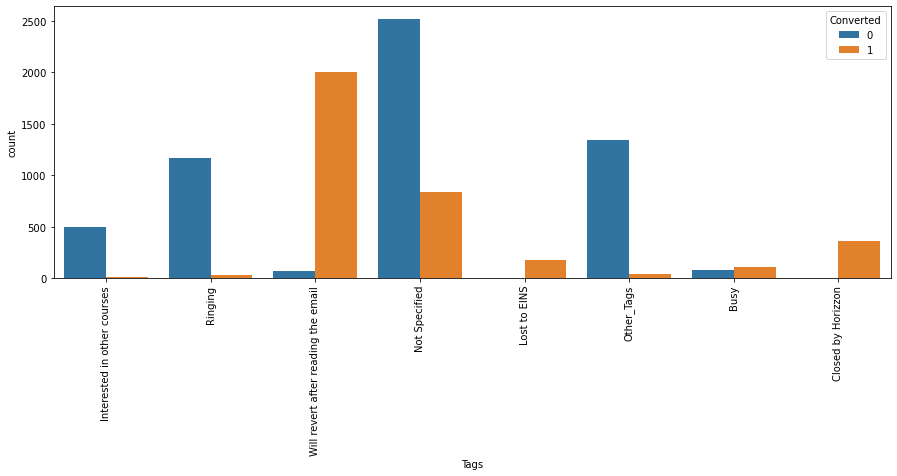

In [28]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [29]:
#Lead Source
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')    

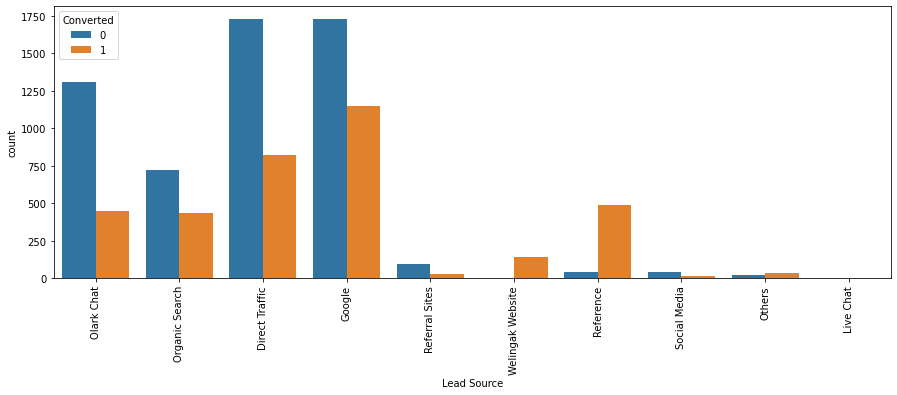

In [31]:
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Maximum number of leads are generated by Google and Direct traffic.

In [32]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [33]:
# Last Activity
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront','View in browser link Clicked',       'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [35]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [36]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [37]:
#Now we drop all those rows who has missing values as we can see dropped rows is less than 2%, it will not affect
df = df.dropna()

In [38]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# Step 4
# Numerical Analysis

correlations of numeric values

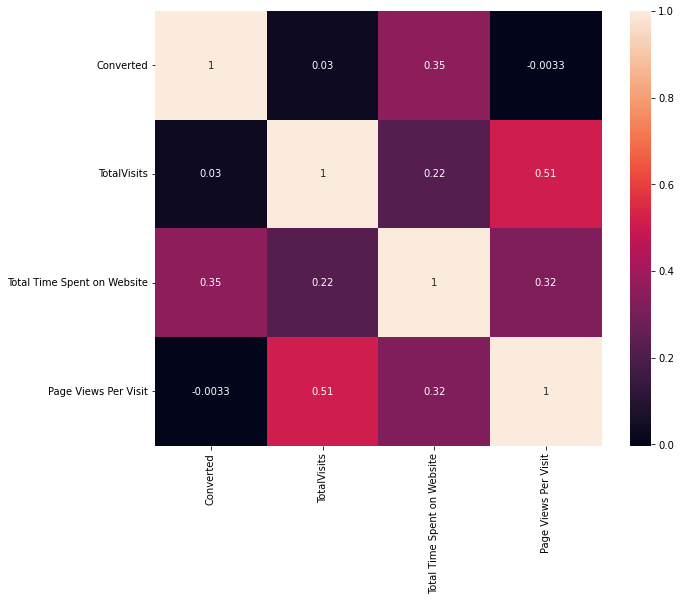

In [39]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

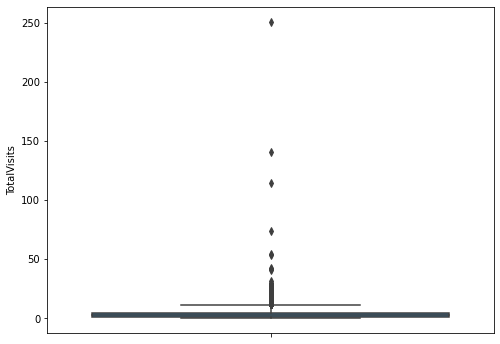

In [40]:
#Total Visits
plt.figure(figsize=(8,6))
sns.boxplot(y=df['TotalVisits'])
plt.show()

We can see the outliers here

In [41]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

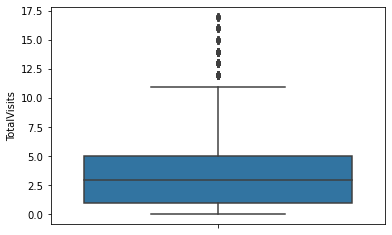

In [42]:
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()


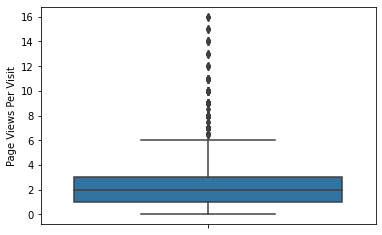

In [43]:
#Page Views Per Visit
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

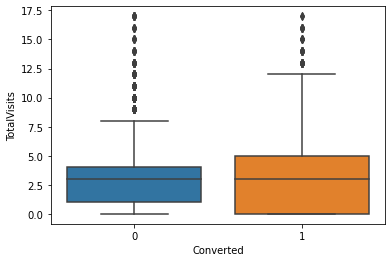

In [46]:
#Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

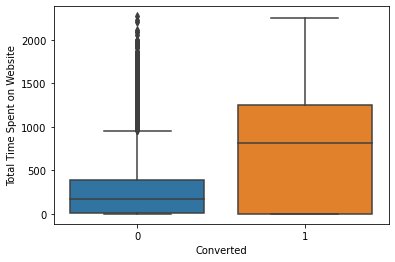

In [47]:
sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

Nothng conclusive can be said on the basis of total visits but Leads spending more time on the website are more
likely to be converted

In [48]:
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values so we can build our model


# Dummy Variable

categorical columns

In [49]:
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[varlist] = df[varlist].apply(binary_map)

In [51]:
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation','City']], drop_first=True)
df = pd.concat([df,dummy],1)

In [52]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [53]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [54]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [55]:
#dropping the original columns
df.drop(cat_cols,1,inplace = True)

In [56]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now the data is ready to build a model 

# Step 5
# Train-Test Split & Logistic Regression Model Building

In [57]:
from sklearn.model_selection import train_test_split
y = df['Converted']
y.head()
X=df.drop('Converted', axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [61]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Model Building using Stats Model & RFE:

In [62]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [63]:
# Running RFE with the output number of the variable equal to 15
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=10)

In [64]:
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', False, 5),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('What is your current occupation_Housewife', False, 23),
 ('What is your current occupation_Other', False, 22),
 ('What is your current occupation_Student', False, 20),
 ('What is your current occupation_Unemployed', False, 19),
 ('What is your current occupation_Working Professional', False, 7),
 ('City_Other Cities', False, 24),
 ('City_Other Cities of Maharashtra', False, 28),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 29),
 ('City_Tier II Cities', False, 21),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_Olark Chat', False, 25),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 13),
 ('Lead Sour

In [66]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [67]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website

# Building model using statsmodel, for the detailed statistics

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1526.4
Date:                Tue, 21 Mar 2023   Deviance:                       3052.8
Time:                        17:02:35   Pearson chi2:                 8.32e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5690
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6636      0.071    -23.462      0.000      -1.803      -1.525
Lead Origin_Lead Add Form                    1.1593      0.422      2.747      0.006       0.332       1.987
Lead Source_Welingak Website                 3.9879      1.098      3.632      0.000       1.836       6.140
Last Activity_Olark Chat Conversation       -1.4868      0.221     -6.726      0.000      -1.920      -1.054
Last Activity_SMS Sent                       1.9648      0.101     19.478      0.000       1.767       2.163
Tags_Closed by Horizzon                      6.5921      1.010      6.529      0.000       4.613       8.571
Tags_Interested in other courses            -2.1762      0.368     -5.915      0.000      -2.897      -1.455
Tags_Lost to EINS                            5.2604      0.598      8.804      0.000       4.089       6.431
Tags_Other_Tags                             -2.3042      0.190    -12.099      0.000      -2.677      -1.931
Tags_Ringing                                -3.0104      0.222    -13.562      0.000      -3.445      -2.575
Tags_Will revert after reading the email     4.5149      0.172     26.266      0.000       4.178       4.852
============================================================================================================
"""

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1526.4
Date:                Tue, 21 Mar 2023   Deviance:                       3052.8
Time:                        17:02:44   Pearson chi2:                 8.32e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5690
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6636      0.071    -23.462      0.000      -1.803      -1.525
Lead Origin_Lead Add Form                    1.1593      0.422      2.747      0.006       0.332       1.987
Lead Source_Welingak Website                 3.9879      1.098      3.632      0.000       1.836       6.140
Last Activity_Olark Chat Conversation       -1.4868      0.221     -6.726      0.000      -1.920      -1.054
Last Activity_SMS Sent                       1.9648      0.101     19.478      0.000       1.767       2.163
Tags_Closed by Horizzon                      6.5921      1.010      6.529      0.000       4.613       8.571
Tags_Interested in other courses            -2.1762      0.368     -5.915      0.000      -2.897      -1.455
Tags_Lost to EINS                            5.2604      0.598      8.804      0.000       4.089       6.431
Tags_Other_Tags                             -2.3042      0.190    -12.099      0.000      -2.677      -1.931
Tags_Ringing                                -3.0104      0.222    -13.562      0.000      -3.445      -2.575
Tags_Will revert after reading the email     4.5149      0.172     26.266      0.000       4.178       4.852
============================================================================================================
"""

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.33
4,Tags_Closed by Horizzon,1.13
6,Tags_Lost to EINS,1.01
0,Lead Origin_Lead Add Form,0.67
2,Last Activity_Olark Chat Conversation,0.27
5,Tags_Interested in other courses,0.27
7,Tags_Other_Tags,0.20
9,Tags_Will revert after reading the email,0.12
3,Last Activity_SMS Sent,0.08
8,Tags_Ringing,0.04


In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6256
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1526.4
Date:                Tue, 21 Mar 2023   Deviance:                       3052.8
Time:                        17:02:47   Pearson chi2:                 8.32e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5690
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6636      0.071    -23.462      0.000      -1.803      -1.525
Lead Origin_Lead Add Form                    1.1593      0.422      2.747      0.006       0.332       1.987
Lead Source_Welingak Website                 3.9879      1.098      3.632      0.000       1.836       6.140
Last Activity_Olark Chat Conversation       -1.4868      0.221     -6.726      0.000      -1.920      -1.054
Last Activity_SMS Sent                       1.9648      0.101     19.478      0.000       1.767       2.163
Tags_Closed by Horizzon                      6.5921      1.010      6.529      0.000       4.613       8.571
Tags_Interested in other courses            -2.1762      0.368     -5.915      0.000      -2.897      -1.455
Tags_Lost to EINS                            5.2604      0.598      8.804      0.000       4.089       6.431
Tags_Other_Tags                             -2.3042      0.190    -12.099      0.000      -2.677      -1.931
Tags_Ringing                                -3.0104      0.222    -13.562      0.000      -3.445      -2.575
Tags_Will revert after reading the email     4.5149      0.172     26.266      0.000       4.178       4.852
============================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.33
4,Tags_Closed by Horizzon,1.13
6,Tags_Lost to EINS,1.01
0,Lead Origin_Lead Add Form,0.67
2,Last Activity_Olark Chat Conversation,0.27
5,Tags_Interested in other courses,0.27
7,Tags_Other_Tags,0.20
9,Tags_Will revert after reading the email,0.12
3,Last Activity_SMS Sent,0.08
8,Tags_Ringing,0.04


In [74]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.062436
4696    0.062436
3274    0.574751
2164    0.004837
1667    0.945387
7024    0.159282
8018    0.041074
778     0.574751
6942    0.004258
4440    0.159282
dtype: float64

In [75]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06243604, 0.06243604, 0.57475053, 0.00483685, 0.94538675,
       0.1592819 , 0.0410744 , 0.57475053, 0.00425845, 0.1592819 ])

In [76]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.062436,9196
1,0,0.062436,4696
2,0,0.574751,3274
3,0,0.004837,2164
4,1,0.945387,1667


In [77]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.062436,9196,0
1,0,0.062436,4696,0
2,0,0.574751,3274,1
3,0,0.004837,2164,0
4,1,0.945387,1667,1


In [78]:
from sklearn import metrics
 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3583  299]
 [ 295 2090]]


In [79]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9052178075634275


In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
TP / float(TP+FN)

0.8763102725366876

In [82]:
TN / float(TN+FP)

0.9229778464708913

In [83]:
print(FP/ float(TN+FP))

0.07702215352910871


In [84]:
# positive predictive value 
print (TP / float(TP+FP))

0.8748430305567183


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9239298607529655


PLOTTING ROC CURVE

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

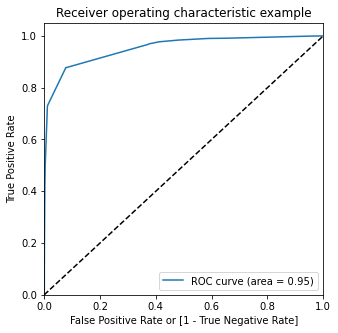

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.95 indicating a good predictive model.

# Finding Optimal Cutoff Point

In [88]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.062436,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.062436,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.574751,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.004837,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.945387,1667,1,1,1,1,1,1,1,1,1,1,1


In [89]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.736237  0.977358  0.588099
0.2   0.2  0.905537  0.877987  0.922463
0.3   0.3  0.905537  0.877987  0.922463
0.4   0.4  0.905218  0.876310  0.922978
0.5   0.5  0.905218  0.876310  0.922978
0.6   0.6  0.890219  0.731237  0.987893
0.7   0.7  0.890219  0.731237  0.987893
0.8   0.8  0.887825  0.723270  0.988923
0.9   0.9  0.885591  0.717400  0.988923


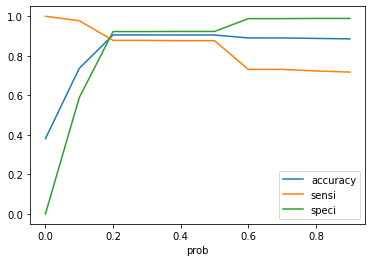

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [91]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.062436,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.062436,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.574751,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.004837,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.945387,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [92]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.062436,9196,0,6
1,0,0.062436,4696,0,6
2,0,0.574751,3274,1,57
3,0,0.004837,2164,0,0
4,1,0.945387,1667,1,95


In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9055369395244933

In [94]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3581,  301],
       [ 291, 2094]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
TP / float(TP+FN)

0.8779874213836478

In [97]:
TN / float(TN+FP)

0.922462648119526


So as we can see above the model seems to be performing well. The ROC curve has a value of 0.95, which is very good. We have the following values for the Train Data:

Accuracy : 90.55%
Sensitivity : 87.79%
Specificity : 92.24%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [98]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07753735188047398


In [99]:
# Positive predictive value 
print (TP / float(TP+FP))

0.874321503131524


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.924845041322314


In [101]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3581,  301],
       [ 291, 2094]], dtype=int64)

In [102]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.874321503131524

In [103]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8779874213836478

In [104]:
from sklearn.metrics import precision_score, recall_score

In [105]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.874321503131524

In [106]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8779874213836478

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

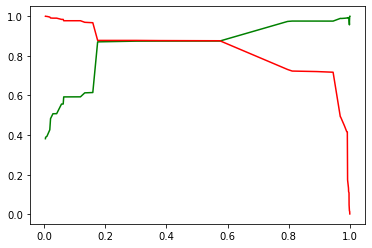

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [110]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [111]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0,0,0,1,0,0,0,0,1,0
984,0,0,0,1,0,0,0,1,0,0
8135,0,0,0,1,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,1,0
2712,0,0,0,0,0,0,0,0,0,1


In [112]:
X_test_sm = sm.add_constant(X_test)

# PREDICTIONS ON TEST SET

In [113]:
y_test_pred = res.predict(X_test_sm)

In [114]:
y_test_pred[:10]

7681    0.062436
984     0.118899
8135    0.574751
6915    0.009249
2712    0.945387
244     0.009249
4698    0.018565
8287    0.041074
6791    0.945387
8970    0.021046
dtype: float64

In [115]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.062436
984,0.118899
8135,0.574751
6915,0.009249
2712,0.945387


In [116]:
y_test_df = pd.DataFrame(y_test)

In [117]:
y_test_df['Prospect ID'] = y_test_df.index

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.062436
1,0,984,0.118899
2,0,8135,0.574751
3,0,6915,0.009249
4,1,2712,0.945387


In [120]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [121]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.062436
1,0,984,0.118899
2,0,8135,0.574751
3,0,6915,0.009249
4,1,2712,0.945387


In [122]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [123]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.062436,6
1,984,0,0.118899,12
2,8135,0,0.574751,57
3,6915,0,0.009249,1
4,2712,1,0.945387,95


In [124]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [125]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.062436,6,0
1,984,0,0.118899,12,0
2,8135,0,0.574751,57,1
3,6915,0,0.009249,1,0
4,2712,1,0.945387,95,1


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9102755026061057

In [127]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1549,  127],
       [ 114,  896]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
TP / float(TP+FN)

0.8871287128712871

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.9242243436754176

In [131]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8758553274682307

In [132]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8871287128712871

After running the model on the Test Data these are the figures we obtain:

Accuracy : 91.02%
Sensitivity : 88.71%
Specificity : 92.42%

# Final Result 
compare the values obtained for Train & Test:

Train Data: Accuracy : 90.55% Sensitivity : 87.79% Specificity : 92.24%
                
Test Data: Accuracy : 91.02% Sensitivity : 88.71% Specificity : 92.42%
                

# Conclusion

-Our Logistic Regression Model is decent and accurate enough

-X Education Company needs to focus on following key aspects to improve the overall conversion rate: a. Increase user engagement on their website since this helps in higher conversion b. Increase on sending SMS notifications since this helps in higher conversion c. Get TotalVisits increased by advertising etc. since this helps in higher conversion d. Improve the Olark Chat service since this is affecting the conversion negatively